# Logistic Regression and Support Vector Machine classifier

### 1. Logistic Regression 
The __logistic function__ (which is more commonly called __sigmoid function__) basically maps an input to an output of values between 0 and 1. And it is defined as follows:
$$y(z) = \frac{1}{1+ exp(-z)}$$

We can visualize it as follows:


First define the logistic function:

In [1]:
import numpy as np
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

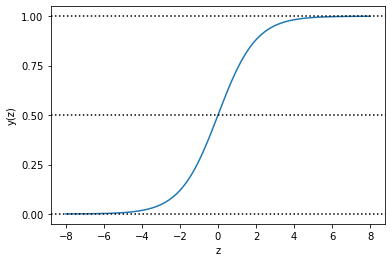

In [2]:
# Input variables from -8 to 8, and the output correspondingly:
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
import matplotlib.pyplot as plt
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

In the S-shaped curve, all inputs are transformed into the range from 0 to 1. For positive inputs, a greater value results in an output closer to 1; for negative inputs, a smaller value generates an output closer to 0; when the input is 0, the
output is the midpoint 0.5.

Logistic regression, by default, is limited to two-class classification problems. It cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems.

__The multinomial logistic regression__ (often just called 'multinomial regression') algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to natively support multi-class classification problems.

### 2. Support Vector Machine

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes.Of particular importance is the use of different kernel functions via the kernel parameter.

Kernels can be used that transform the input space into higher dimensions such as a Polynomial Kernel and a Radial Kernel. This is called the Kernel Trick. It is desirable to use more complex kernels as it allows lines to separate the classes that are curved or even more complex. This in turn can lead to more accurate classifiers.

### Assignment

In this assignment, you are given a dataset comprising information about dinosaurs. You will use logistic regression and support vector machine models to predict the type of dinosaur based on the provided information. In this assignment, you may utilize built-in libraries. Employ _stratified k-fold cross-validation_ (CV) with 10 folds for evaluating the classification models. Stratification ensures that each CV fold maintains a similar distribution of class examples as the entire training set. You can design various experiments by selecting some/all information provided in the dataset. Here, we expect the best result you obtained after these experiments and observations. Please explicitly mention your feature selection method in your report while presenting results. 


Stratified k-fold cross-validation is a technique used to evaluate the performance of machine learning models, particularly in classification tasks, where the target class distribution may be imbalanced. In this method, the dataset is divided into 'k' equally sized folds, ensuring that each fold maintains a similar distribution of class examples as the entire dataset. This stratification process helps to reduce the bias and variance in model performance estimation by preventing a skewed distribution of classes in the train and test sets.

During the cross-validation process, the model is trained on 'k-1' folds and tested on the remaining fold, iterating this process 'k' times. Each iteration uses a different fold for testing, and the average performance metric (e.g., accuracy) is calculated over all iterations.

Here's a code example using the scikit-learn library:


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)  # Set the number of folds to 5

# Initialize the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Perform stratified k-fold cross-validation
accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.9733333333333334


In this example, we use the Iris dataset and a logistic regression model to demonstrate stratified k-fold cross-validation with 5 folds. The performance of the model is evaluated using accuracy as the performance metric, and the mean accuracy is reported.

Stratified cross-validation is particularly useful when dealing with imbalanced datasets, where some classes have significantly fewer examples compared to others. In such cases, using standard cross-validation might lead to situations where one or more folds contain very few or even none of the underrepresented class instances. This could result in an inaccurate and biased performance estimation of the model, as the model is not adequately tested on all classes.

For balanced datasets, where class distributions are roughly equal, stratified cross-validation may not provide significant benefits over standard cross-validation. However, it is still a good practice to use stratified cross-validation as a default approach, as it generally leads to more stable and reliable performance estimates.

__Evaluation Metrics__: Provide _mean weighted F1 scores_ and a confusion matrix to evaluate and compare the performance of the classification models.

Here is an example code how to compute mean weighted F1 score in k-fold cross-validation setting:

In [ ]:
f1_scores = []

# Perform k-fold stratified cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    # Necessary code to compute the predictions using your classifier..
    #...
    # y_pred = ...
    
    # Compute the weighted-average F1-score for this fold
    fold_f1_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(fold_f1_score)

# Calculate the mean F1-score across all folds
mean_weighted_f1_score = np.mean(f1_scores)
print("Mean weighted-average F1-score across", k, "folds:", mean_weighted_f1_score)

### Submissions


After training your models with the data in _train.csv_, use the given _test.csv_ data for your predictions (predicted 'type' values); save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition for logistic regression: https://www.kaggle.com/t/1aad2bcbe8c14b80918ec67ef7041c9b

Kaggle competition for support vector machine: https://www.kaggle.com/t/f4f6aee930674ea3a86aada32d861cfa

**Due Date**: 30.04.2023

**Note**: The late submission rules previously announced from the piazza apply.

### Your Work

In [ ]:
#Include your codes below by including as many cells as necessary to clearly demonstrate your work
#Please write your codes in separate sections for data pre-processing, Logistic Regression and SVM models etc.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics

#### Data Preprocessing

##### Feature Selection:
- id, name, period, lived_in, length, named_by, link features removed because of following reasons:
    - id column is redundant
    - name is unique for each entry, ie. cannot be used for classification
    - period, lived_in, length information is not related to type
    - named_by, and link information is not related to type
    - species column dropped since there is null values that cannot be filled
##### Categorical Data Encoding:
> Diet encoding:
<br />
Diet information one hot encoded

> Taxonomy Encoding
<br />
Two different encodings used for taxonomy information and used
> 1. Taxonomy information one hot encoded
> 2. Unique words in taxonomy column splitted and one hot encoded based on word exists in entry or not
>     - 'Dinosauria' feature removed since it exists in every record, and therefore cannot be used for classification


In [2]:
def diet_encoder(df: pd.DataFrame) -> None:
    """Encodes "diet" column of given dataframe

    Args:
        df (pd.DataFrame): dataframe
    """
    for diet in set(df['diet']):
        mask = df['diet'] == diet
        df[diet] = 0
        df.loc[mask, diet] = 1
    
    mask = df['herbivorous/omnivorous'] == 1
    df.loc[mask, 'herbivorous'] = 1
    df.loc[mask, 'omnivorous'] = 1
    
    df.drop(['diet', 'herbivorous/omnivorous'], axis = 1, inplace=True)
    
def taxonomy_encoder(df: pd.DataFrame) -> None:
    """Encodes "taxonomy" column of given dataframe

    Args:
        df (pd.DataFrame): dataframe
    """
    taxonomy_set = set()
    for i in set(df['taxonomy']):
        for j in i.strip().split():
            taxonomy_set.add(j)
    
    for tax in taxonomy_set:
        mask = df['taxonomy'].str.contains(tax)
        df[tax] = 0
        df.loc[mask, tax] = 1
    
    df.drop(['taxonomy'], axis=1, inplace=True)
    df.drop(['Dinosauria'], axis=1, inplace=True)


##### Taxonomy One-hot Encoded
GridSearchCV used for hyper-parameter search with StratifiedKFold with k = 10

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train_n = len(df_train)
df_test['type'] = None

df = pd.concat([df_train, df_test])
df.drop(["id", "name", "period", "lived_in", "length", "named_by", "species", "link"], axis=1, inplace=True)

diet_encoder(df)
df = pd.get_dummies(df, columns=["taxonomy"])

cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]

df_train = df[:train_n]
df_test = df[train_n:]

df_train = df_train.astype({'type' : 'category'})

x, y = df_train[cols[:-1]].values, df_train[cols[-1:]].values.ravel()

In [4]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"], 'multi_class': ['ovr'], 'solver': ['liblinear'], 'max_iter' : [100, 250, 500]}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, grid, cv=10) # Note that cv=10 means that StratifiedKFold used with k = 10
grid_search.fit(x, y)
print("Logistic Regression Best parameters\n",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

grid = {'C': np.logspace(-3, 3, 7),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 5, 7], 'decision_function_shape': ['ovo', 'ovr']}
support_vector_machine = svm.SVC()
grid_search = GridSearchCV(support_vector_machine, grid, cv=10) # Note that cv=10 means that StratifiedKFold used with k = 10
grid_search.fit(x, y)
print("SVM Best parameters\n",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Logistic Regression Best parameters
 {'C': 1000.0, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8536666666666667
SVM Best parameters
 {'C': 100.0, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'sigmoid'}
Accuracy : 0.8376666666666667


In [5]:
def get_results(predictor: BaseEstimator, x, y):
    f1_scores = []
    conf_matrix = []

    skf = StratifiedKFold(10)
    for train_index, test_index in skf.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]
        predictor.fit(x_train, y_train)

        predictions = predictor.predict(x_test)
        cm = metrics.confusion_matrix(y_test, predictions)
        score = predictor.score(x_test, y_test)
        f1_score = metrics.f1_score(y_test, predictions, average='weighted')

        conf_matrix.append(cm)
        f1_scores.append(f1_score)

    conf_matrix = np.sum(conf_matrix, axis=0)
    return np.mean(f1_scores), conf_matrix / np.sum(conf_matrix, axis=1)

Logistic Regression f1-score:	0.8451848087098087
Support Vector Machine f1-score:	0.832181918081918


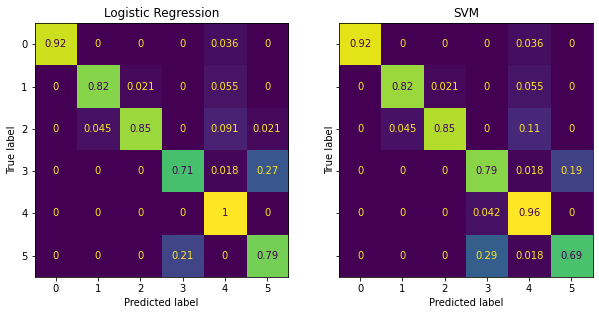

In [6]:
predictor = LogisticRegression(C = 1000.0, max_iter = 100, multi_class = 'ovr', penalty = 'l1', solver = 'liblinear')
log_f1_score, log_conf_matrix = get_results(predictor, x, y)
print("Logistic Regression f1-score:\t" + str(log_f1_score))

predictor = svm.SVC(C=100.0, decision_function_shape='ovo',
                    degree=3, kernel='sigmoid')
svm_f1_score, svm_conf_matrix = get_results(predictor, x, y)
print("Support Vector Machine f1-score:\t" + str(svm_f1_score))

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
disp = metrics.ConfusionMatrixDisplay(log_conf_matrix)
disp.plot(ax = ax[0])
disp.ax_.set_title("Logistic Regression")
disp.im_.colorbar.remove()
disp = metrics.ConfusionMatrixDisplay(svm_conf_matrix)
disp.plot(ax = ax[1])
disp.ax_.set_title("SVM")
disp.im_.colorbar.remove()

plt.show()

##### Taxonomy Custom Encoded
GridSearchCV used for hyper-parameter search with StratifiedKFold with k = 10

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train_n = len(df_train)
df_test['type'] = None

df = pd.concat([df_train, df_test])
df.drop(["id", "name", "period", "lived_in", "length",
        "named_by", "species", "link"], axis=1, inplace=True)

diet_encoder(df)
taxonomy_encoder(df)

cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]

df_train = df[:train_n]
df_test = df[train_n:]

df_train = df_train.astype({'type': 'category'})

x, y = df_train[cols[:-1]].values, df_train[cols[-1:]].values.ravel()

C:\Users\usr\AppData\Local\Temp\ipykernel_11668\1314638898.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tax] = 0


In [8]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"], 'multi_class': ['ovr'], 'solver': ['liblinear'], 'max_iter' : [100, 250, 500]}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, grid, cv=10) # Note that cv=10 means that StratifiedKFold used with k = 10
grid_search.fit(x, y)
print("Logistic Regression Best parameters\n",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

grid = {'C': np.logspace(-3, 3, 7),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 5, 7], 'decision_function_shape': ['ovo', 'ovr']}
support_vector_machine = svm.SVC()
grid_search = GridSearchCV(support_vector_machine, grid, cv=10) # Note that cv=10 means that StratifiedKFold used with k = 10
grid_search.fit(x, y)
print("SVM Best parameters\n",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Logistic Regression Best parameters
 {'C': 10.0, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9151666666666667
SVM Best parameters
 {'C': 100.0, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'sigmoid'}
Accuracy : 0.9111666666666668


Logistic Regression f1-score:	0.9108683816183817
Support Vector Machine f1-score:	0.9084951973951976


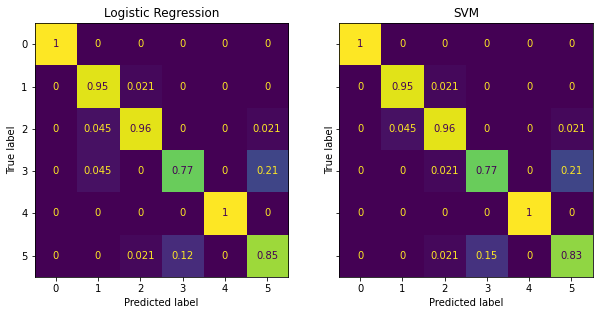

In [12]:
predictor = LogisticRegression(
    C=10.0, max_iter=100, multi_class='ovr', penalty='l1', solver='liblinear')
log_f1_score, log_conf_matrix = get_results(predictor, x, y)
print("Logistic Regression f1-score:\t" + str(log_f1_score))

predictor = svm.SVC(C=100.0, decision_function_shape='ovo',
                    degree=3, kernel='sigmoid')
svm_f1_score, svm_conf_matrix = get_results(predictor, x, y)
print("Support Vector Machine f1-score:\t" + str(svm_f1_score))

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
disp = metrics.ConfusionMatrixDisplay(log_conf_matrix)
disp.plot(ax=ax[0])
disp.ax_.set_title("Logistic Regression")
disp.im_.colorbar.remove()
disp = metrics.ConfusionMatrixDisplay(svm_conf_matrix)
disp.plot(ax=ax[1])
disp.ax_.set_title("SVM")
disp.im_.colorbar.remove()

plt.show()

As one can see from test results, using custom taxonomy encoding improves model performance.

Since we are using gridsearch to find best model, and comparing best ones between each other, SVM and Logistic Regression has similar performance where Logistic regression has slightly better results for 'small theropod' (category number 5).

In [26]:
predictor = LogisticRegression(
    C=10.0, max_iter=100, multi_class='ovr', penalty='l1', solver='liblinear')
log_f1_score, log_conf_matrix = get_results(predictor, x, y)
print("Logistic Regression f1-score:\t" + str(log_f1_score))

x_test = df_test[cols[:-1]].values
pred = predictor.predict(x_test)

test = pd.DataFrame(pred)
test.columns = ['type']
test.to_csv('Logistic_Regression_predictions.csv')


Logistic Regression f1-score:	0.9106906038406037
